# Project 1: Image Classification and Regression - LAURES Benoit

The file ``mp1.py`` must be in the same directory as this current Jupyter Notebook file.

For some reason, Tensorflow GPU doesn't work in Jupyter Notebook: I force it to use CPU. It that's not a problem for you, you may want to skip this cell.

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from mp1 import *  # File 'mp1.py' should be in the same folder, if not: this line may have to be modified.
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Conv2DTranspose
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


## Simple Classification and weights visualization

Let's generate training and testing datasets and one-hot encode it

In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
[X_test, Y_test] = generate_dataset_classification(100, 20)

Creating data:
0
100
200
Creating data:
0


In [4]:
print(X_train.shape, Y_train.shape)

(300, 5184) (300,)


In [5]:
one_hot_encoder = OneHotEncoder(dtype=int)
Y_train_encoded = one_hot_encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_encoded = one_hot_encoder.fit_transform(Y_test.reshape(-1, 1)).toarray()

In [6]:
print(Y_train_encoded.shape)
print(Y_train_encoded[0])

(300, 3)
[0 0 1]


### Stochastic Gradient Descent

Create the model

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=5184))
model.add(Activation('softmax'))

First let's optimize it with stochastic gradient descent.

In [8]:
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0)

We'll follow the training with the accuracy metric.

In [9]:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train_encoded, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
300/300 [==============================] - 2s 7ms/step - loss: 0.7112 - acc: 0.6244
Epoch 2/30
300/300 [==============================] - 0s 164us/step - loss: 0.6502 - acc: 0.6600
Epoch 3/30
300/300 [==============================] - 0s 150us/step - loss: 0.6241 - acc: 0.6833
Epoch 4/30
300/300 [==============================] - 0s 165us/step - loss: 0.5890 - acc: 0.7011
Epoch 5/30
300/300 [==============================] - 0s 165us/step - loss: 0.5677 - acc: 0.7289
Epoch 6/30
300/300 [==============================] - 0s 160us/step - loss: 0.5392 - acc: 0.7467
Epoch 7/30
300/300 [==============================] - 0s 174us/step - loss: 0.5176 - acc: 0.7667
Epoch 8/30
300/300 [==============================] - 0s 162us/step - loss: 0.4992 - acc: 0.7900
Epoch 9/30
300/300 [==============================] - 0s 159us/step - loss: 0.4806 - acc: 0.8100
Epoch 10/30
300/300 [==============================] - 0s 170us/step - loss: 0.4709 - acc: 0.8067
Epoch 11/30
300/300 [==========

Let's now evaluate our network with a testing set.

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test_encoded)
print("Accuracy on test set is : ", accuracy)

100/100 [==============================] - 0s 402us/step
Accuracy on test set is :  0.8933333468437195


The network outputs very nice predictions.
Let's now visualize the content of the layer.

In [12]:
weights, bias = model.get_weights()
print(weights.shape)

(5184, 3)


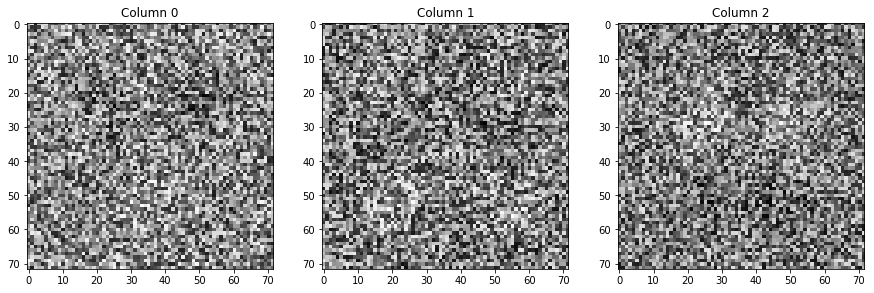

In [13]:
plt.figure(figsize=(15, 30))
plt.subplot(1, 3, 1)
plt.title("Column 0")
plt.imshow(weights[:, 0].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Column 1")
plt.imshow(weights[:, 1].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Column 2")
plt.imshow(weights[:, 2].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.show()

The columns are rather noisy, it's difficult to perceive anything.

### Adam optimizer
Let's do the same steps for the Adam optimizer

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=5184))
model.add(Activation('softmax'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train_encoded, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
300/300 [==============================] - 0s 1ms/step - loss: 0.9551 - acc: 0.6211
Epoch 2/30
300/300 [==============================] - 0s 167us/step - loss: 0.6521 - acc: 0.6889
Epoch 3/30
300/300 [==============================] - 0s 165us/step - loss: 0.4368 - acc: 0.7911
Epoch 4/30
300/300 [==============================] - 0s 167us/step - loss: 0.3079 - acc: 0.8656
Epoch 5/30
300/300 [==============================] - 0s 164us/step - loss: 0.2579 - acc: 0.8900
Epoch 6/30
300/300 [==============================] - 0s 165us/step - loss: 0.2237 - acc: 0.8989
Epoch 7/30
300/300 [==============================] - 0s 155us/step - loss: 0.1666 - acc: 0.9400
Epoch 8/30
300/300 [==============================] - 0s 169us/step - loss: 0.1468 - acc: 0.9522
Epoch 9/30
300/300 [==============================] - 0s 147us/step - loss: 0.1769 - acc: 0.9067
Epoch 10/30
300/300 [==============================] - 0s 164us/step - loss: 0.1928 - acc: 0.9122
Epoch 11/30
300/300 [==========

We can note that the training is much faster.

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test_encoded)
print("Accuracy on test set is : ", accuracy)

100/100 [==============================] - 0s 565us/step
Accuracy on test set is :  1.0


This model is even better trained than the previous one. Let's check the weights.

In [17]:
weights, bias = model.get_weights()
print(weights.shape)

(5184, 3)


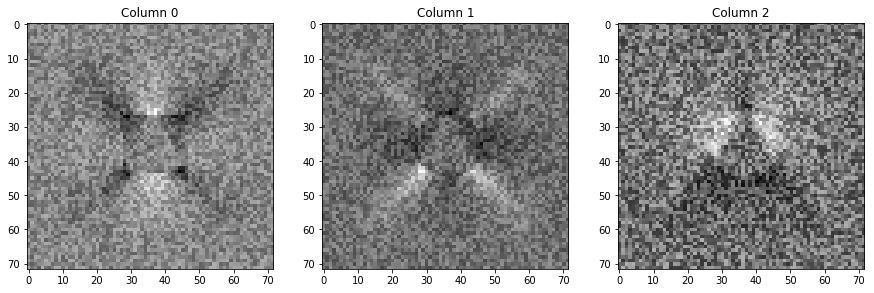

In [18]:
plt.figure(figsize=(15, 30))
plt.subplot(1, 3, 1)
plt.title("Column 0")
plt.imshow(weights[:, 0].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Column 1")
plt.imshow(weights[:, 1].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Column 2")
plt.imshow(weights[:, 2].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.show()

This time, the columns are rather meaningful: we can clearly see each form we want to classify (square, circle, triangle).

## A More Difficult Classification Problem

Let's generate training and testing datasets and one-hot encode it (we'll use more data than in the previous part because it's more complex).

In [19]:
[X_train, Y_train] = generate_dataset_classification(600, 20, True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
100
200
300
400
500
Creating data:
0
100
200


In [20]:
one_hot_encoder = OneHotEncoder(dtype=int)
Y_train_encoded = one_hot_encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
print(Y_train_encoded.shape)
print(Y_test.shape)

(600, 3)
(300, 3)


### Linear classifier

Let's rebuild the linear classifier with Adam optimizer as it gave the best results.

In [21]:
model = Sequential()
model.add(Dense(3, input_dim=5184))
model.add(Activation('softmax'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train_encoded, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
600/600 [==============================] - 0s 584us/step - loss: 1.5241 - acc: 0.5417
Epoch 2/30
600/600 [==============================] - 0s 154us/step - loss: 0.8501 - acc: 0.5972
Epoch 3/30
600/600 [==============================] - 0s 152us/step - loss: 0.6884 - acc: 0.6456
Epoch 4/30
600/600 [==============================] - 0s 152us/step - loss: 0.5945 - acc: 0.6889
Epoch 5/30
600/600 [==============================] - 0s 149us/step - loss: 0.6021 - acc: 0.6922
Epoch 6/30
600/600 [==============================] - 0s 158us/step - loss: 0.5290 - acc: 0.7389
Epoch 7/30
600/600 [==============================] - 0s 159us/step - loss: 0.4913 - acc: 0.7622
Epoch 8/30
600/600 [==============================] - 0s 153us/step - loss: 0.4938 - acc: 0.7511
Epoch 9/30
600/600 [==============================] - 0s 153us/step - loss: 0.5338 - acc: 0.7394
Epoch 10/30
600/600 [==============================] - 0s 151us/step - loss: 0.6150 - acc: 0.6894
Epoch 11/30
600/600 [========

We can already note that the training is not as good as in the previous part because the accuracy on the training set is lower: the data is indeed more complex.


Let's try on the testing set.

In [23]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy on test set is : ", accuracy)

300/300 [==============================] - 0s 296us/step
Accuracy on test set is :  0.7422222201029459


Indeed, accuracy on the testing set is much lower (about 70%) than previously (it was about 100%). Let's check the content of the weights.

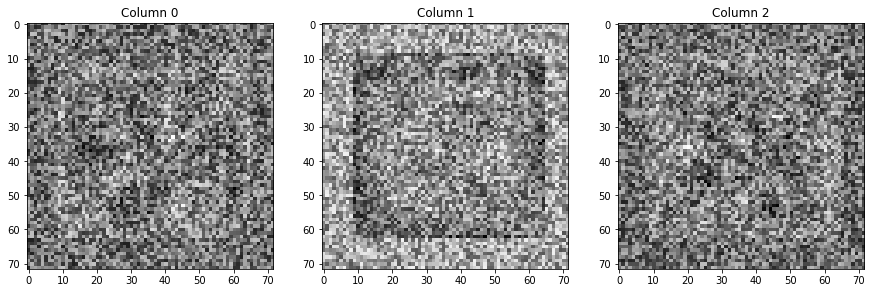

In [24]:
weights, bias = model.get_weights()

plt.figure(figsize=(15, 30))
plt.subplot(1, 3, 1)
plt.title("Column 0")
plt.imshow(weights[:, 0].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Column 1")
plt.imshow(weights[:, 1].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Column 2")
plt.imshow(weights[:, 2].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.show()

As expected, the linear classifier didn't manage to properly learn the shapes of the data and the vizualisations of the weights are very blurry.

### Small CNN

First, let's change the shape of data so that one example is a square matrix (72 x 72) and not a flat vector (of size 5184 x 1).

In [25]:
print("Before : ", X_train.shape)
X_train = X_train.reshape(-1, 72, 72, 1)
X_test = X_test.reshape(-1, 72, 72, 1)
print("After : ", X_train.shape)

Before :  (600, 5184)
After :  (600, 72, 72, 1)


Let's build a small CNN to compare the results.

In [26]:
model = Sequential()
model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train_encoded, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 1.0833 - acc: 0.5822
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5697 - acc: 0.6983
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5147 - acc: 0.7717
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4609 - acc: 0.7994
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4216 - acc: 0.8094
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3765 - acc: 0.8578
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3522 - acc: 0.8689
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3294 - acc: 0.8806
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3094 - acc: 0.9017
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2861 - acc: 0.9061
Epoch 11/30
600/600 [============================

In [28]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Loss on test set is : ", loss)
print("Accuracy on test set is : ", accuracy)

300/300 [==============================] - 0s 1ms/step
Loss on test set is :  0.28257517735163373
Accuracy on test set is :  0.8744444553057352


The accuracy is much better with this small CNN than with the linear classifier. However, the testing loss is greater than training loss so there's a bit of overfitting here. We thus could add a dropout layer to deal with it.

## A Regression Problem

First let's check the data.

In [29]:
[X_train, Y_train] = generate_dataset_regression(800, 20)
[X_test, Y_test] = generate_test_set_regression()


Creating data:
0
100
200
300
400
500
600
700
Creating data:
0
100
200


In [30]:
def orden_vertices_coordinates(Y):
    """Ordens the coordinates of the vertices by increasing abscissa."""
    if len(Y.shape) != 2:
        return Y
    Y_ordered = Y.copy()
    for i in range(Y.shape[0]):
        order = 2*np.argsort([Y[i, 0], Y[i, 2], Y[i, 4]])
        Y_ordered[i, :] = [Y[i, order[0]], Y[i, order[0] + 1], Y[i, order[1]], Y[i, order[1] + 1], Y[i, order[2]], Y[i, order[2] + 1]]
    return Y_ordered

(800, 5184) (800, 6)
(300, 5184) (300, 6)


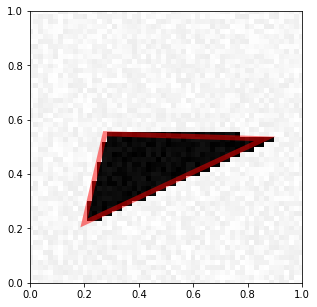

In [31]:
X_train_reshaped = X_train.reshape(-1, 72, 72, 1)
X_test_reshaped = X_test.reshape(-1, 72, 72, 1)

Y_train = orden_vertices_coordinates(Y_train)
Y_test = orden_vertices_coordinates(Y_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
visualize_prediction(X_train[0], Y_train[0])

Let's now build a regressor (Conv layers + 1 Fully-connected, with dropout and batch normalization) with the mean squared error as loss function.

In [32]:
model = Sequential()
# model.add(BatchNormalization(input_shape=(72, 72, 1)))
model.add(Conv2D(8, (3, 3), strides=(1, 1), activation='relu', input_shape=(72, 72, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(16, (3, 3), strides=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))

model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu'))
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))

model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))

model.add(Flatten())
# model.add(Dense(2048, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, decay=0)
model.compile(optimizer=adam, loss='mean_squared_error')

In [33]:
model.fit(X_train_reshaped, Y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.1)

Train on 720 samples, validate on 80 samples
Epoch 1/30
720/720 [==============================] - 11s 16ms/step - loss: 0.0517 - val_loss: 0.0523
Epoch 2/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0366 - val_loss: 0.0502
Epoch 3/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0335 - val_loss: 0.0437
Epoch 4/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0290 - val_loss: 0.0432
Epoch 5/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0260 - val_loss: 0.0407
Epoch 6/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0243 - val_loss: 0.0413
Epoch 7/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0221 - val_loss: 0.0349
Epoch 8/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0206 - val_loss: 0.0365
Epoch 9/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0193 - val_loss: 0.0310
Epoch 10/30
720/720 [================

In [34]:
print("Loss on training set is : ", model.evaluate(X_train_reshaped, Y_train))
print("Loss on test set is : ", model.evaluate(X_test_reshaped, Y_test))

800/800 [==============================] - 3s 4ms/step
Loss on training set is :  0.00783801093697548
300/300 [==============================] - 1s 4ms/step
Loss on test set is :  0.01437840111553669


I struggled to have the network learn something without too much overfitting. Let's now visualize the prediction on an example of the testing set.

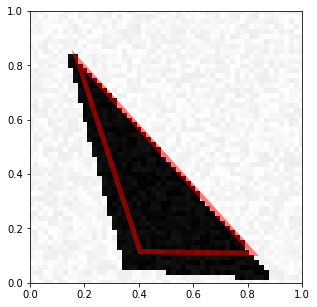

In [35]:
i = np.random.randint(300)
visualize_prediction(X_test[i], model.predict(X_test_reshaped[i].reshape(1, 72, 72, 1)))

## Image Denoising

First, let's define the functions to generate and display data.

In [36]:
def generate_dataset_denoising(nb_samples, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples, im_size])
    X_noisy = np.zeros([nb_samples, im_size])
    noise = []
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        noise.append(100 * np.random.random())
        if category == 0:
            X[i], X_noisy[i] = generate_a_rectangle(noise[-1], free_location, return_both=True)
        elif category == 1:
            X[i], X_noisy[i] = generate_a_disk(noise[-1], free_location, return_both=True)
        else:
            X[i], X_noisy[i], _ = generate_a_triangle(noise[-1], free_location, return_both=True)
    X = X / 255
    X_noisy = (X_noisy + np.min(noise)) / (255 + np.max(noise) + np.min(noise))
    return X.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1), X_noisy.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)


def generate_test_set_denoising():
    return generate_dataset_denoising(300, True)


def visualize_denoising(x_noisy, x_real, x_reconstruced=None):
    plt.figure(figsize=(15, 15))

    plt.subplot(1, 3, 1)
    plt.title("Real drawing")
    plt.imshow(x_real.reshape((IMAGE_SIZE, IMAGE_SIZE)), cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Noisy drawing")
    plt.imshow(x_noisy.reshape((IMAGE_SIZE, IMAGE_SIZE)), cmap='gray')

    if x_reconstruced is not None:
        plt.subplot(1, 3, 3)
        plt.title("Reconstructed drawing")
        plt.imshow(x_reconstruced.reshape((IMAGE_SIZE, IMAGE_SIZE)), cmap='gray')

    plt.show()

Now, let's generate the data.

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100
200
(1000, 72, 72, 1) (1000, 72, 72, 1)


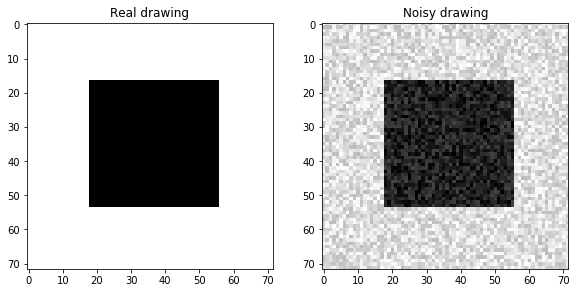

In [37]:
X_train, X_train_noisy = generate_dataset_denoising(1000)
X_test, X_test_noisy = generate_test_set_denoising()
print(X_train.shape, X_train_noisy.shape)
visualize_denoising(X_train_noisy[0], X_train[0])

Now let's build a hourglass network for denoising : 2 Conv layers (stride 2) + 1 Conv layer (stride 1) + 2 TransposedConv layers (stride 2), all with 'ReLu' activation function except last which has 'Sigmoid'.

In [38]:
model = Sequential()
model.add(Conv2D(8, (3, 3), strides=(2, 2), activation='relu', input_shape=(72, 72, 1), padding='same'))
model.add(Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='same'))

model.add(Conv2DTranspose(8, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), activation='sigmoid', padding='same'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy')

In [39]:
model.fit(X_train, X_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 3s 3ms/step - loss: 0.6563 - val_loss: 0.5576
Epoch 2/20
900/900 [==============================] - 2s 2ms/step - loss: 0.4398 - val_loss: 0.3112
Epoch 3/20
900/900 [==============================] - 2s 2ms/step - loss: 0.2178 - val_loss: 0.1093
Epoch 4/20
900/900 [==============================] - 2s 2ms/step - loss: 0.0708 - val_loss: 0.0441
Epoch 5/20
900/900 [==============================] - 2s 2ms/step - loss: 0.0367 - val_loss: 0.0292
Epoch 6/20
900/900 [==============================] - 2s 2ms/step - loss: 0.0261 - val_loss: 0.0221
Epoch 7/20
900/900 [==============================] - 2s 2ms/step - loss: 0.0201 - val_loss: 0.0174
Epoch 8/20
900/900 [==============================] - 2s 2ms/step - loss: 0.0160 - val_loss: 0.0140
Epoch 9/20
900/900 [==============================] - 2s 2ms/step - loss: 0.0132 - val_loss: 0.0119
Epoch 10/20
900/900 [==============================] -

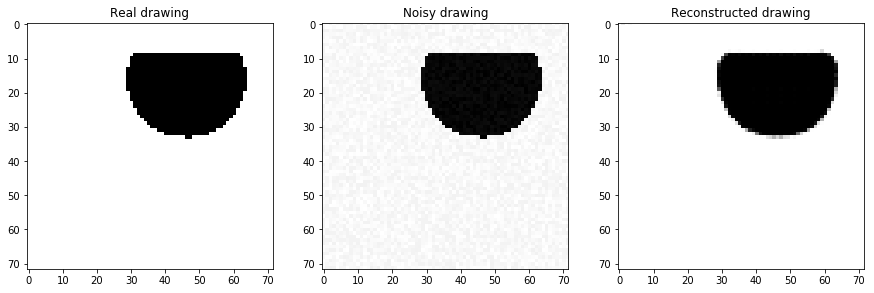

In [40]:
i = np.random.randint(300)
visualize_denoising(X_test_noisy[i], X_test[i], model.predict(X_test[i].reshape(1, 72, 72, 1)))

The network reconstructs remarkably well the drawing without any noise !